In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import dask.array as da
import pyproj
import sys
from joblib import Parallel, delayed
from tqdm import tqdm
from pycontrails import Flight, Fleet, MetDataset
from pycontrails.core import models
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.physics import geo, thermo, units, constants
from pycontrails.models.gpat.gpat import GPAT

In [2]:
# flight trajectory parameters
fl_params = {
    "t0_fl": pd.to_datetime("2022-01-20 13:00:00"),  # flight start time
    "rt_fl": pd.Timedelta(minutes=60),  # flight run time
    "ts_fl": pd.Timedelta(minutes=2),  # flight time step
    "ac_type": "A320",  # aircraft type
    "fl0_speed": 100.0,  # m/s
    "fl0_heading": 0.0,  # deg
    "fl0_coords0": (0.1, 0.125, 12500),  # lat, lon, alt [deg, deg, m]
    "sep_dist": (5000, 2000, 0),  # dx, dy, dz [m]
    "n_ac": 1,  # number of aircraft
}

In [3]:
 # plume dispersion parameters
plume_params = {
    "dt_integration": pd.Timedelta(minutes=2),  # integration time step
    "max_age": pd.Timedelta(hours=1),  # maximum age of the plume
    "depth": 50.0,  # initial plume depth, [m]
    "width": 50.0,  # initial plume width, [m]
    "shear": 0.01,  # wind shear [1/s]
    "hres_pl": 0.05, # horizontal resolution of the plume [deg]
    "vres_pl": 500 # vertical resolution of the plume [m]
}

In [4]:
# chemistry sim parameters
sim_params = {
    "t0_sim": pd.to_datetime("2022-01-20 12:00:00"),  # chemistry start time
    "rt_sim": pd.Timedelta(hours=12),  # chemistry runtime
    "ts_sim": pd.Timedelta(seconds=20),  # chemistry time step
    "lat_bounds": (0.0, 1.0),  # lat bounds [deg]
    "lon_bounds": (0.0, 1.0),  # lon bounds [deg]
    "alt_bounds": (12000, 13000),  # alt bounds [m]
    "hres_sim": 0.05,  # horizontal resolution [deg]
    "vres_sim": 500,  # vertical resolution [m]
    "eastward_wind": 0.0,  # m/s
    "northward_wind": 0.0,  # m/s
    "lagrangian_tendency_of_air_pressure": 0.0,  # m/s
    "species_out": np.array([3, 4, 5, 6, 8, 9]) #, 14, 21, 22, 39, 198])
}

In [5]:
gpat = GPAT(fl_params, plume_params, sim_params)

In [6]:
gpat.alts

array([12000, 12500, 13000])

In [7]:
gpat.eval()

/home/ktait98/miniconda3/envs/contrails/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/ktait98/pycontrails_kt/pycontrails/models/gpat/gpat.py:363: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fl[i].dataframe[column] = fl[i].dataframe[column].fillna(method='ffill')


Processing time:  2022-01-20 13:02:00


/home/ktait98/pycontrails_kt/pycontrails/models/gpat/gpat.py:417: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fl[i][column] = fl[i][column].fillna(method='ffill')


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Processing time:  2022-01-20 13:04:00


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:06:00


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:08:00


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:10:00


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:12:00


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:14:00


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:16:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:18:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:20:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:22:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:24:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:26:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:28:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:30:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:32:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:34:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:36:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:38:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:40:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:42:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:44:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:46:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:48:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:50:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:52:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:54:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:56:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 13:58:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:02:00


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:04:00


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:06:00


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:08:00


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:10:00


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:12:00


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Processing time:  2022-01-20 14:14:00


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

/home/ktait98/pycontrails_kt/pycontrails/models/gpat/gpat.py:593: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.boxm_ds["J"] = (["time", "level", "longitude", "latitude", "photol_params"], da.zeros((self.boxm_ds.dims["time"], self.boxm_ds.dims["level"], self.boxm_ds.dims["longitude"], self.boxm_ds.dims["latitude"], 5)))
/home/ktait98/pycontrails_kt/pycontrails/models/gpat/gpat.py:595: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.boxm_ds["DJ"] = (["time", "level", "longitude", "latitude", "photol_coeffs"], da.zeros((self.boxm_ds.dims["time"], self.boxm_ds.dims["level"], self.boxm

MultiIndex([(165.10085173011288, 0.0,                 0.0),
            (165.10085173011288, 0.0,                0.05),
            (165.10085173011288, 0.0,                 0.1),
            (165.10085173011288, 0.0, 0.15000000000000002),
            (165.10085173011288, 0.0,                 0.2),
            (165.10085173011288, 0.0,                0.25),
            (165.10085173011288, 0.0, 0.30000000000000004),
            (165.10085173011288, 0.0, 0.35000000000000003),
            (165.10085173011288, 0.0,                 0.4),
            (165.10085173011288, 0.0,                0.45),
            ...
            (193.30062328740988, 1.0,                0.55),
            (193.30062328740988, 1.0,  0.6000000000000001),
            (193.30062328740988, 1.0,                0.65),
            (193.30062328740988, 1.0,  0.7000000000000001),
            (193.30062328740988, 1.0,                0.75),
            (193.30062328740988, 1.0,                 0.8),
            (193.3006232

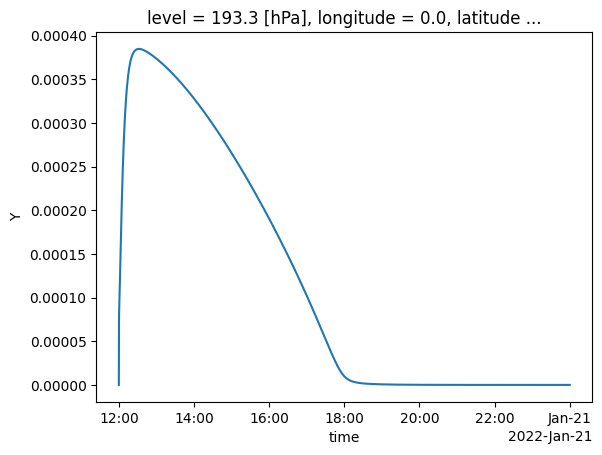

In [12]:
gpat.chem["Y"].sel(species_out=0, longitude=0.0, latitude=0.0).sel(level=193, method="nearest").plot()